In [1]:
import pandas as pd
import numpy as np
import seaborn

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

from sklearn.multiclass import OneVsRestClassifier

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import xgboost as xgb

In [32]:
data = pd.read_csv('1622.csv')
data

,Unnamed: 0,level_0,index,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,...,AwayGoal,HomeConceded,AwayConceded,HomeAvgPoint,AwayAvgPoint,Season,Matchweek,Home_code,Away_code,Venue_code
0,0,0,0,E0,13/08/16,Burnley,Swansea,0,1,A,...,0.0,0.0,0.0,0.000000,0.000000,2016,1,5,25,5
1,1,1,1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,...,0.0,0.0,0.0,0.000000,0.000000,2016,1,8,28,8
2,2,2,2,E0,13/08/16,Everton,Tottenham,1,1,D,...,0.0,0.0,0.0,0.000000,0.000000,2016,1,9,26,9
3,3,3,3,E0,13/08/16,Hull,Leicester,2,1,H,...,0.0,0.0,0.0,0.000000,0.000000,2016,1,12,14,12
4,4,4,4,E0,13/08/16,Man City,Sunderland,2,1,H,...,0.0,0.0,0.0,0.000000,0.000000,2016,1,16,24,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2275,2275,375,E0,22/05/2022,Crystal Palace,Man United,1,0,H,...,57.0,46.0,56.0,1.171806,1.823789,2021,38,8,17,8
2276,2276,2276,376,E0,22/05/2022,Leicester,Southampton,4,1,H,...,42.0,58.0,63.0,1.409692,1.127753,2021,38,14,22,14
2277,2277,2277,377,E0,22/05/2022,Liverpool,Wolves,3,1,H,...,37.0,25.0,40.0,2.224670,1.403974,2021,38,15,30,15
2278,2278,2278,378,E0,22/05/2022,Man City,Aston Villa,3,2,H,...,50.0,24.0,51.0,2.348018,1.194690,2021,38,16,1,16


In [5]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 2
    elif(row.FTR == 'A'):
        return 0
    else:
        return 1
data['FullTime'] = data.apply(lambda row: transformResult(row),axis=1)

In [105]:
data['pastHP-AP'] = data['pastHP']-data['pastAP']
data['pastHG-AG'] = data['pastHG']-data['pastAG']
data['pastAGC-HGC'] = data['pastAGC']-data['pastHGC']
data['GoalDiff'] = data['HomeGoal']-data['AwayGoal']
data['ConcededDiff'] = data['AwayConceded']-data['HomeConceded']
data['PointDiff'] = data['HomeFullPoint'] - data['AwayFullPoint']
data['EloDiff'] = data['HomeAvgPoint']-data['AwayAvgPoint']

In [106]:
#'Home_code','Away_code','Venue_code','Matchweek','Season','HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','pastHP-AP','pastHG-AG','pastAGC-HGC','HomeAvgPoint','AwayAvgPoint'

In [107]:
x = data[['Home_code','Away_code','Venue_code','Matchweek','Season','HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','pastHP', 'pastAP','pastHG','pastAG','pastHGC','pastAGC','HomeAvgPoint','AwayAvgPoint']]

In [108]:
x

,Home_code,Away_code,Venue_code,Matchweek,Season,HomeFullPoint,AwayFullPoint,HomeGoal,AwayGoal,HomeConceded,AwayConceded,pastHP,pastAP,pastHG,pastAG,pastHGC,pastAGC,HomeAvgPoint,AwayAvgPoint
0,5,25,5,1,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,8,28,8,1,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,9,26,9,1,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,12,14,12,1,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,16,24,16,1,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,8,17,8,38,2021,45.0,58.0,49.0,57.0,46.0,56.0,3.0,3.0,3.0,3.0,4.0,4.0,1.171806,1.823789
2276,14,22,14,38,2021,49.0,40.0,58.0,42.0,58.0,63.0,0.0,0.0,6.0,1.0,2.0,5.0,1.409692,1.127753
2277,15,30,15,38,2021,89.0,51.0,91.0,37.0,25.0,40.0,1.0,1.0,4.0,2.0,2.0,6.0,2.224670,1.403974
2278,16,1,16,38,2021,90.0,45.0,96.0,50.0,24.0,51.0,2.0,2.0,7.0,2.0,3.0,2.0,2.348018,1.194690


In [57]:
mask = ('Home_code','Away_code','Venue_code','Matchweek','Season','HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','pastHP', 'pastAP','pastHG','pastAG','pastHGC','pastAGC','HomeAvgPoint','AwayAvgPoint')

In [91]:
scaler = StandardScaler()

In [92]:
x.loc[:, mask] = scaler.fit_transform(x.loc[:, mask])

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [104]:
x

,Home_code,Away_code,Venue_code,Matchweek,Season,HomeFullPoint,AwayFullPoint,HomeGoal,AwayGoal,HomeConceded,AwayConceded,pastHP,pastAP,pastHG,pastAG,pastHGC,pastAGC,HomeAvgPoint,AwayAvgPoint
0,-1.078297,1.111138,-1.078297,-1.687055,-1.46385,-1.361659,-1.369586,-1.384541,-1.392202,-1.498269,-1.495089,-1.424129,-1.424129,-1.396857,-1.459643,-1.467739,-1.475104,-2.764818,-2.811592
1,-0.749881,1.439553,-0.749881,-1.687055,-1.46385,-1.361659,-1.369586,-1.384541,-1.392202,-1.498269,-1.495089,-1.424129,-1.424129,-1.396857,-1.459643,-1.467739,-1.475104,-2.764818,-2.811592
2,-0.640410,1.220610,-0.640410,-1.687055,-1.46385,-1.361659,-1.369586,-1.384541,-1.392202,-1.498269,-1.495089,-1.424129,-1.424129,-1.396857,-1.459643,-1.467739,-1.475104,-2.764818,-2.811592
3,-0.311994,-0.093051,-0.311994,-1.687055,-1.46385,-1.361659,-1.369586,-1.384541,-1.392202,-1.498269,-1.495089,-1.424129,-1.424129,-1.396857,-1.459643,-1.467739,-1.475104,-2.764818,-2.811592
4,0.125892,1.001666,0.125892,-1.687055,-1.46385,-1.361659,-1.369586,-1.384541,-1.392202,-1.498269,-1.495089,-1.424129,-1.424129,-1.396857,-1.459643,-1.467739,-1.475104,-2.764818,-2.811592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,-0.749881,0.235364,-0.749881,1.687055,1.46385,1.042633,1.726592,1.272112,1.704864,1.189145,1.786889,0.079350,0.079350,0.177715,0.110162,0.652277,0.741562,-0.450313,0.832448
2276,-0.093051,0.782723,-0.093051,1.687055,1.46385,1.256348,0.765709,1.760068,0.889847,1.890209,2.197136,-1.424129,-1.424129,1.752287,-0.936375,-0.407731,1.295729,0.019549,-0.558273
2277,0.016421,1.658497,0.016421,1.687055,1.46385,3.393496,1.352915,3.549243,0.618174,-0.037718,0.849181,-0.922969,-0.922969,0.702572,-0.413107,-0.407731,1.849895,1.629261,-0.006368
2278,0.125892,-1.516184,0.125892,1.687055,1.46385,3.446925,1.032621,3.820330,1.324522,-0.096140,1.493855,-0.421809,-0.421809,2.277145,-0.413107,0.122273,-0.366771,1.872893,-0.424529


In [94]:
Y = data[['FTR']]


In [95]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
y = label_encoded_y
y

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 1, ..., 2, 2, 0])

In [110]:

x_train = x[0:1900]
y_train = y[0:1900]
x_test = x[1900:2280]
y_test= y[1900:2280]

In [111]:
param_init = {
    "objective": "multi:softmax",
    "num_class" : 4,
    "base_score" : 0.5,
    "min_child_weight" : 30,
    "booster": "gbtree",
    "max_depth": 2, # default: 3 only for depthwise
    "n_estimators": 60, # default: 500
    "learning_rate": 0.1, # default: 0.05
    "subsample": 0.7,
    "colsample_bytree": 1,  # default:  1.0
    "colsample_bylevel": 1, # default: 1.0
    "validate_parameters": 1,
    "random_state": 0,
 
    #
    "silent": True,
    "n_jobs": -1, 
 
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "depthwise", # default depthwise
}
 
param_fit = {
    "eval_metric": ['auc','merror','mlogloss'],
    "early_stopping_rounds": 500, # default: 100
    "verbose": 2,
    "eval_set": [(x_train, y_train), (x_test, y_test)]
}
 
xgb_model = xgb.XGBClassifier(**param_init)
xgb_model.fit(x_train, y_train, **param_fit)
evals_result = xgb_model.evals_result()

[07:43:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-auc:0.67370	validation_0-merror:0.46263	validation_0-mlogloss:1.07940	validation_1-auc:0.65215	validation_1-merror:0.47632	validation_1-mlogloss:1.08155
[2]	validation_0-auc:0.68743	validation_0-merror:0.46053	validation_0-mlogloss:1.04975	validation_1-auc:0.66170	validation_1-merror:0.46579	validation_1-mlogloss:1.05532
[4]	validation_0-auc:0.69364	validation_0-merror:0.46053	validation_0-mlogloss:1.02803	validation_1-auc:0.67607	validation_1-merror:0.46842	validation_1-mlogloss:1.03772
[6]	validation_0-auc:0.69792	validation_0-merror:0.46158	validation_0-mlogloss:1.01072	validation_1-auc:0.67587	validation_1-merror:0.47105	validation_1-mlogloss:1.02432
[8]	validation_0-auc:0.70008	validation_0-merror:0.46105	validation_0-mlogloss:0.99682	validation_1-auc:0.68164	validation_1

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.71262	validation_0-merror:0.45947	validation_0-mlogloss:0.97194	validation_1-auc:0.68605	validation_1-merror:0.46842	validation_1-mlogloss:0.99367
[16]	validation_0-auc:0.71548	validation_0-merror:0.45737	validation_0-mlogloss:0.96657	validation_1-auc:0.68361	validation_1-merror:0.47895	validation_1-mlogloss:0.99098
[18]	validation_0-auc:0.71761	validation_0-merror:0.45789	validation_0-mlogloss:0.96148	validation_1-auc:0.68416	validation_1-merror:0.47105	validation_1-mlogloss:0.98711
[20]	validation_0-auc:0.71989	validation_0-merror:0.45421	validation_0-mlogloss:0.95695	validation_1-auc:0.68453	validation_1-merror:0.46579	validation_1-mlogloss:0.98464
[22]	validation_0-auc:0.72148	validation_0-merror:0.45158	validation_0-mlogloss:0.95301	validation_1-auc:0.68588	validation_1-merror:0.47105	validation_1-mlogloss:0.98266
[24]	validation_0-auc:0.72215	validation_0-merror:0.45316	validation_0-mlogloss:0.94990	validation_1-auc:0.68485	validation_1-merror:0.47632	vali

In [112]:
clf_XGB = xgb_model.fit(x_train,y_train)

[07:44:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [113]:
y_pred_XGB = clf_XGB.predict(x_test)

In [114]:
accuracy_score(y_pred_XGB, y_test)

0.5552631578947368

Confusion matrix, without normalization
[[ 93   0  36]
 [ 37   0  51]
 [ 45   0 118]]


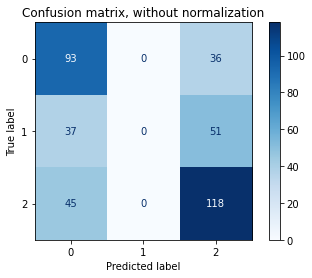

Normalized confusion matrix
[[0.72093023 0.         0.27906977]
 [0.42045455 0.         0.57954545]
 [0.27607362 0.         0.72392638]]


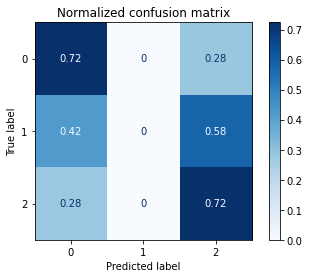

In [115]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names=[0, 1, 2]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_XGB, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    plt.show()

In [21]:
param_init2 = {
    "objective": "multi:softmax",
    "num_class": 3,
    "base_score" : 0.5,
    "min_child_weight" : 30,
    "booster": "gbtree",
    "max_depth": 2, # default: 3 only for depthwise
    "n_estimators": 60, # default: 500
    "learning_rate": 0.1, # default: 0.05
    "subsample": 0.7,
    "colsample_bytree": 1,  # default:  1.0
    "colsample_bylevel": 1, # default: 1.0
    "validate_parameters": 1,
    "random_state": 0,
 
    #
    "silent": True,
    "n_jobs": -1, 
 
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "depthwise", # default depthwise
}

In [22]:
model = XGBClassifier(**param_init2)

In [23]:
clf_X = model.fit(x_train, y_train)

[07:22:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [24]:
prediction = clf_X.predict(x_test)

In [25]:
accuracy_score(prediction, y_test)

0.55

Confusion matrix, without normalization
[[ 89   0  40]
 [ 38   0  50]
 [ 43   0 120]]


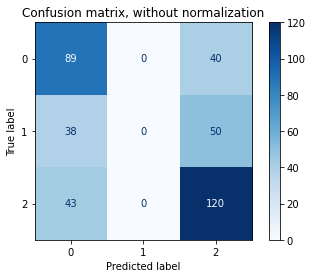

Normalized confusion matrix
[[0.68992248 0.         0.31007752]
 [0.43181818 0.         0.56818182]
 [0.26380368 0.         0.73619632]]


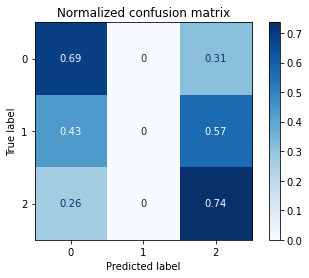

In [26]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names=[0, 1, 2]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_X, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    plt.show()

In [109]:
x.to_csv('dataset.csv')